In [1]:
import numpy as np
import pandas as pd
import konlpy
import matplotlib as plt
import re
from tqdm import tqdm
from konlpy.tag import Mecab
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
ref=pd.read_csv('attraction_all_translate.csv',encoding='utf-8')
ref=ref.drop(ref.columns[[6,7,8]],axis=1)
ref=ref.dropna(subset=['score'],axis=0)

In [3]:
for index,row in ref.iterrows():
    ref['text'][index]=re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', '',ref['text'][index])
    ref['text'][index]=ref['text'][index].replace(".","").strip()
    ref['text'][index]=re.sub('[^|가-힣|0-9|a-zA-Z]+','',ref['text'][index])

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [4]:
mecab=Mecab(dicpath="C:\mecab\mecab-ko-dic")
ref['token']=ref['text'].apply(mecab.pos)

In [5]:
def extraction(text_tokens):
    return_list=[]
    for text_token in text_tokens:
        if text_token[1] in ['VV','VA','NNG','XR','VCN']:
            if text_token[0] not in ['있','하','되','가','없']:
                return_list.append(text_token[0])
    return return_list

In [6]:
ref['token_1']=ref['token'].apply(extraction)
ref[:10]

,space,type,language,day,text,score,token,token_1
0,힐스파,체험,한국어,201702,경치최고찜질방에서하루숙박했습니다달맞이길윗쪽에위치해서해운대일대가한눈에내려다보이는정말최...,5.0,"[(경치, NNG), (최고, NNG), (찜질방, NNG), (에서, JKB), ...","[경치, 최고, 찜질방, 하루, 숙박, 달맞이, 길, 위치, 해운대, 한눈, 보이,..."
1,힐스파,체험,한국어,201711,경치가좋은스파너무좋아요해운대바다가보이는스파라서스파하는동안기분이좋아요야외스파도있어서시...,5.0,"[(경치, NNG), (가, JKS), (좋, VA), (은, ETM), (스파, ...","[경치, 좋, 좋, 해운대, 바다, 보이, 동안, 기분, 좋, 야외, 시원, 좋]"
2,힐스파,체험,한국어,201710,여독풀기좋은장소하루종일여행후피로를녹이기좋은장소주차도잘됩니다바다풍경이매우좋습니다사우나...,4.0,"[(여독, NNG), (풀, VV), (기, ETN), (좋, VA), (은, ET...","[여독, 풀, 좋, 장소, 하루, 종일, 여행, 후, 피로, 녹이, 좋, 장소, 주..."
3,힐스파,체험,한국어,201602,달맞이고개의훌륭한목욕탕달맞이고개에자리하고있으며고지대에위치한덕분에목욕탕에서아름다운해운...,5.0,"[(달맞이, NNG), (고개, NNG), (의, JKG), (훌륭, XR), (한...","[달맞이, 고개, 훌륭, 목욕탕, 달맞이, 고개, 자리, 고지대, 위치, 덕분, 목..."
4,힐스파,체험,한국어,201504,해운대달맞이고개의찜질방찜질하는찜질방입니다스파도같이운영합니다방문객이많아서숙박용숙소로는...,3.0,"[(해운대, NNG), (달맞이, NNG), (고개, NNG), (의, JKG), ...","[해운대, 달맞이, 고개, 찜질방, 찜질, 찜질방, 운영, 방문객, 많, 숙박, 숙..."
5,힐스파,체험,한국어,201303,오션뷰에서엄청싸게숙박돌아가는비행기가다음날아침편이었기때문에이날은숙소를잡지못하고여기에서...,3.0,"[(오션, NNP), (뷰, NNP), (에서, JKB), (엄청, MAG), (싸...","[싸, 숙박, 돌아가, 비행기, 다음, 날, 아침, 이날, 숙소, 잡, 숙박, 택시..."
6,힐스파,체험,한국어,201206,경치는좋아요밖에서보이는경치는좋은편인데사람들이많은탓인지별로청결하게보이지는않았어요이른아...,3.0,"[(경치, NNG), (는, JX), (좋, VA), (아요, EF), (밖, NN...","[경치, 좋, 밖, 보이, 경치, 좋, 사람, 많, 탓, 청결, 보이, 아침, 해뜨..."
7,힐스파,체험,한국어,201202,바다온천베스타스파의가장멋진점은탕에들어가면바다에서목욕하는듯한느낌이든다는것이다벽이유리로...,4.0,"[(바다, NNG), (온천, NNG), (베스타스, NNP), (파, NNG), ...","[바다, 온천, 파, 점, 탕, 들어가, 바다, 목욕, 느낌, 벽, 유리, 밖, 해..."
8,힐스파,체험,한국어,201201,바다위에둥둥아침일찍바다를볼수있다는기대감으로고고몸을담글수있는탕이모두바다를볼수있게되어있...,5.0,"[(바다위, NNP), (에, JKB), (둥둥, MAG), (아침, NNG), (...","[아침, 바다, 기대감, 고고, 몸, 탕, 바다, 몸, 시원, 따뜻, 노천탕, 시설..."
9,힐스파,체험,한국어,201105,전면유리밖으로해운대바다랑광안대교가보입니다할머니랑엄마랑같이밤에한번아침에한번갔습니다시설...,4.0,"[(전면, NNG), (유리, NNG), (밖, NNG), (으로, JKB), (해...","[전면, 유리, 밖, 해운대, 바다, 광안, 대교, 할머니, 엄마, 밤, 아침, 시..."


In [7]:
from gensim import corpora
dc=corpora.Dictionary(ref['token_1'])
corpus=[dc.doc2bow(text) for text in ref['token_1']]

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
import gensim
from gensim.models.ldamodel import LdaModel

lda_model_good=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dc,num_topics=10,iterations=50,update_every=1,eval_every=1,chunksize=100,per_word_topics=True,alpha='auto',passes=10)
lda_model_bad=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dc,num_topics=15,iterations=50,update_every=1,chunksize=100,per_word_topics=True,alpha='auto',passes=10)

In [9]:
from gensim.models.coherencemodel import CoherenceModel

#출처: https://joyhong.tistory.com/138 [옳은 길로..]

In [10]:
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=3):
    coherence_values=[]
    model_list=[]
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel=CoherenceModel(model=model, texts=texts, dictionary=dictionary,coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list,coherence_values

In [11]:
def find_optimal_number_of_topics(dictionary,corpus,processed_data):
    limit=40;
    start=2;
    step=6;
    
    model_list, coherence_values=compute_coherence_values(dictionary=dictionary,corpus=corpus,texts=processed_data,start=start,limit=limit,step=step)
    x=range(start,limit,step)
    plt.plot(x,coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


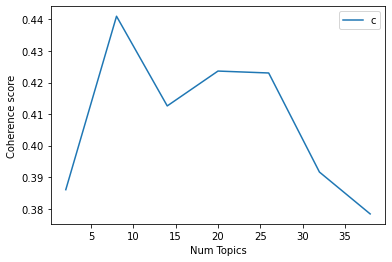

AttributeError: 'NoneType' object has no attribute 'savefig'

In [23]:
import matplotlib.pyplot as plt

plt=find_optimal_number_of_topics(dc,corpus,ref['token_1'])
plt.savefig('LDAG.jpg')

In [24]:
import gensim
from gensim.models.ldamodel import LdaModel

lda_model_1=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dc,num_topics=8,iterations=50,update_every=1,eval_every=1,chunksize=100,per_word_topics=True,alpha='auto',passes=10)
lda_model_2=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dc,num_topics=9,iterations=50,update_every=1,eval_every=1,chunksize=100,per_word_topics=True,alpha='auto',passes=10)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
print('Perplexity_good: ', lda_model_1.log_perplexity(corpus))
print('\nPerplexity_bad: ', lda_model_2.log_perplexity(corpus))

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity_good:  -7.9213516489192

Perplexity_bad:  -8.025052976210185


In [26]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model_1, texts=ref['token_1'], dictionary=dc, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score_1: ', coherence_lda)
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=ref['token_1'], dictionary=dc, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score_2: ', coherence_lda)

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score_1:  0.35695982397356496

Coherence Score_2:  0.3799545851360848


In [27]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model_1,corpus,dc)
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis,'test8.html')

C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model_2,corpus,dc)
pyLDAvis.save_html(vis,'test9.html')


C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
